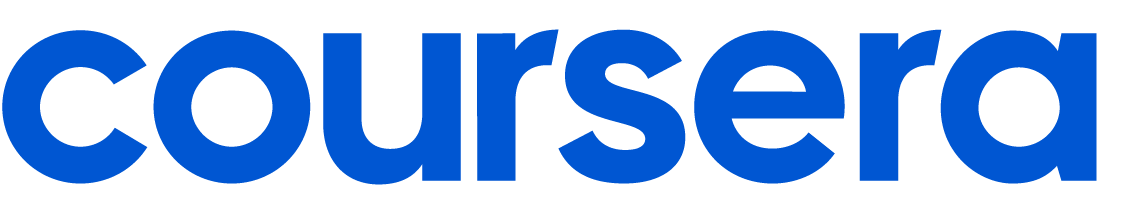

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the label label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to labels interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

np.random.seed(42)  # Set the random seed
random_data = np.random.rand(10)

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Import any other packages you may want to use
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



2023-08-11 10:12:04.552092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

#### Check the data as follows:
1. Check missing values
2. Drop any columns if needed 
3. Separate and investigate the categorial data as well as numerical data
4. Visually inspect all these columns to check any correlations 
5. Check whether we need to scale the features based on above inspection
6. Check whether the data are imbalanced

In [6]:
#Let us first check whether  are any missing values
train_df.isna().sum()


AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

 As seen above, there are no missing values in this data, so we don't need any imputation.

In [7]:
# CustomerID is an unique identifier column and does not play any role in our analysis, therefore, we will drop it.
train_df_noid=train_df.drop(["CustomerID"],axis=1) 
#Divide the data into numerical and categorical
obj_df=train_df_noid.select_dtypes("object")
num_df=train_df_noid.select_dtypes(include=['float64', 'int64'])

#### Create a heatmap of the numerical columns. 

<Axes: >

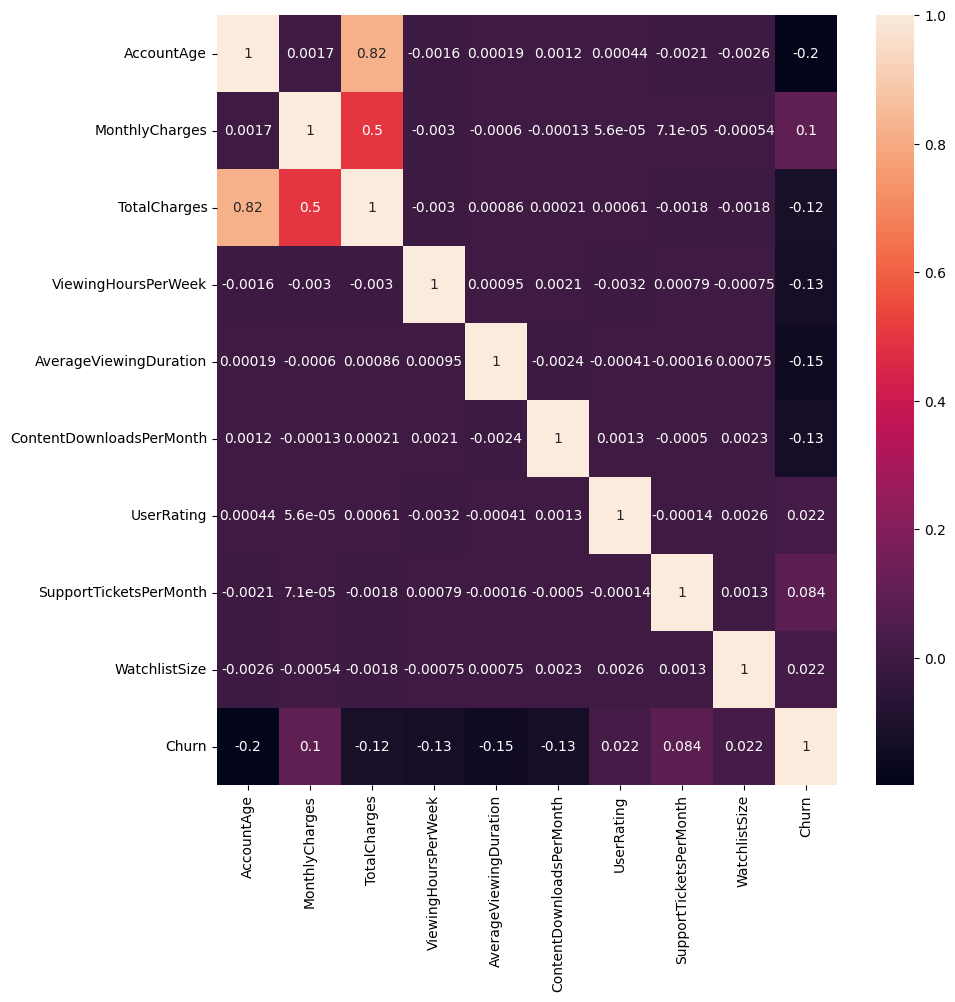

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(), annot=True)

Most of the features are not correlated with the label. Let us also also investigate each numerical feature to draw more insights into the churning patterns.

#### Plot the numerical data as well as categorical data.

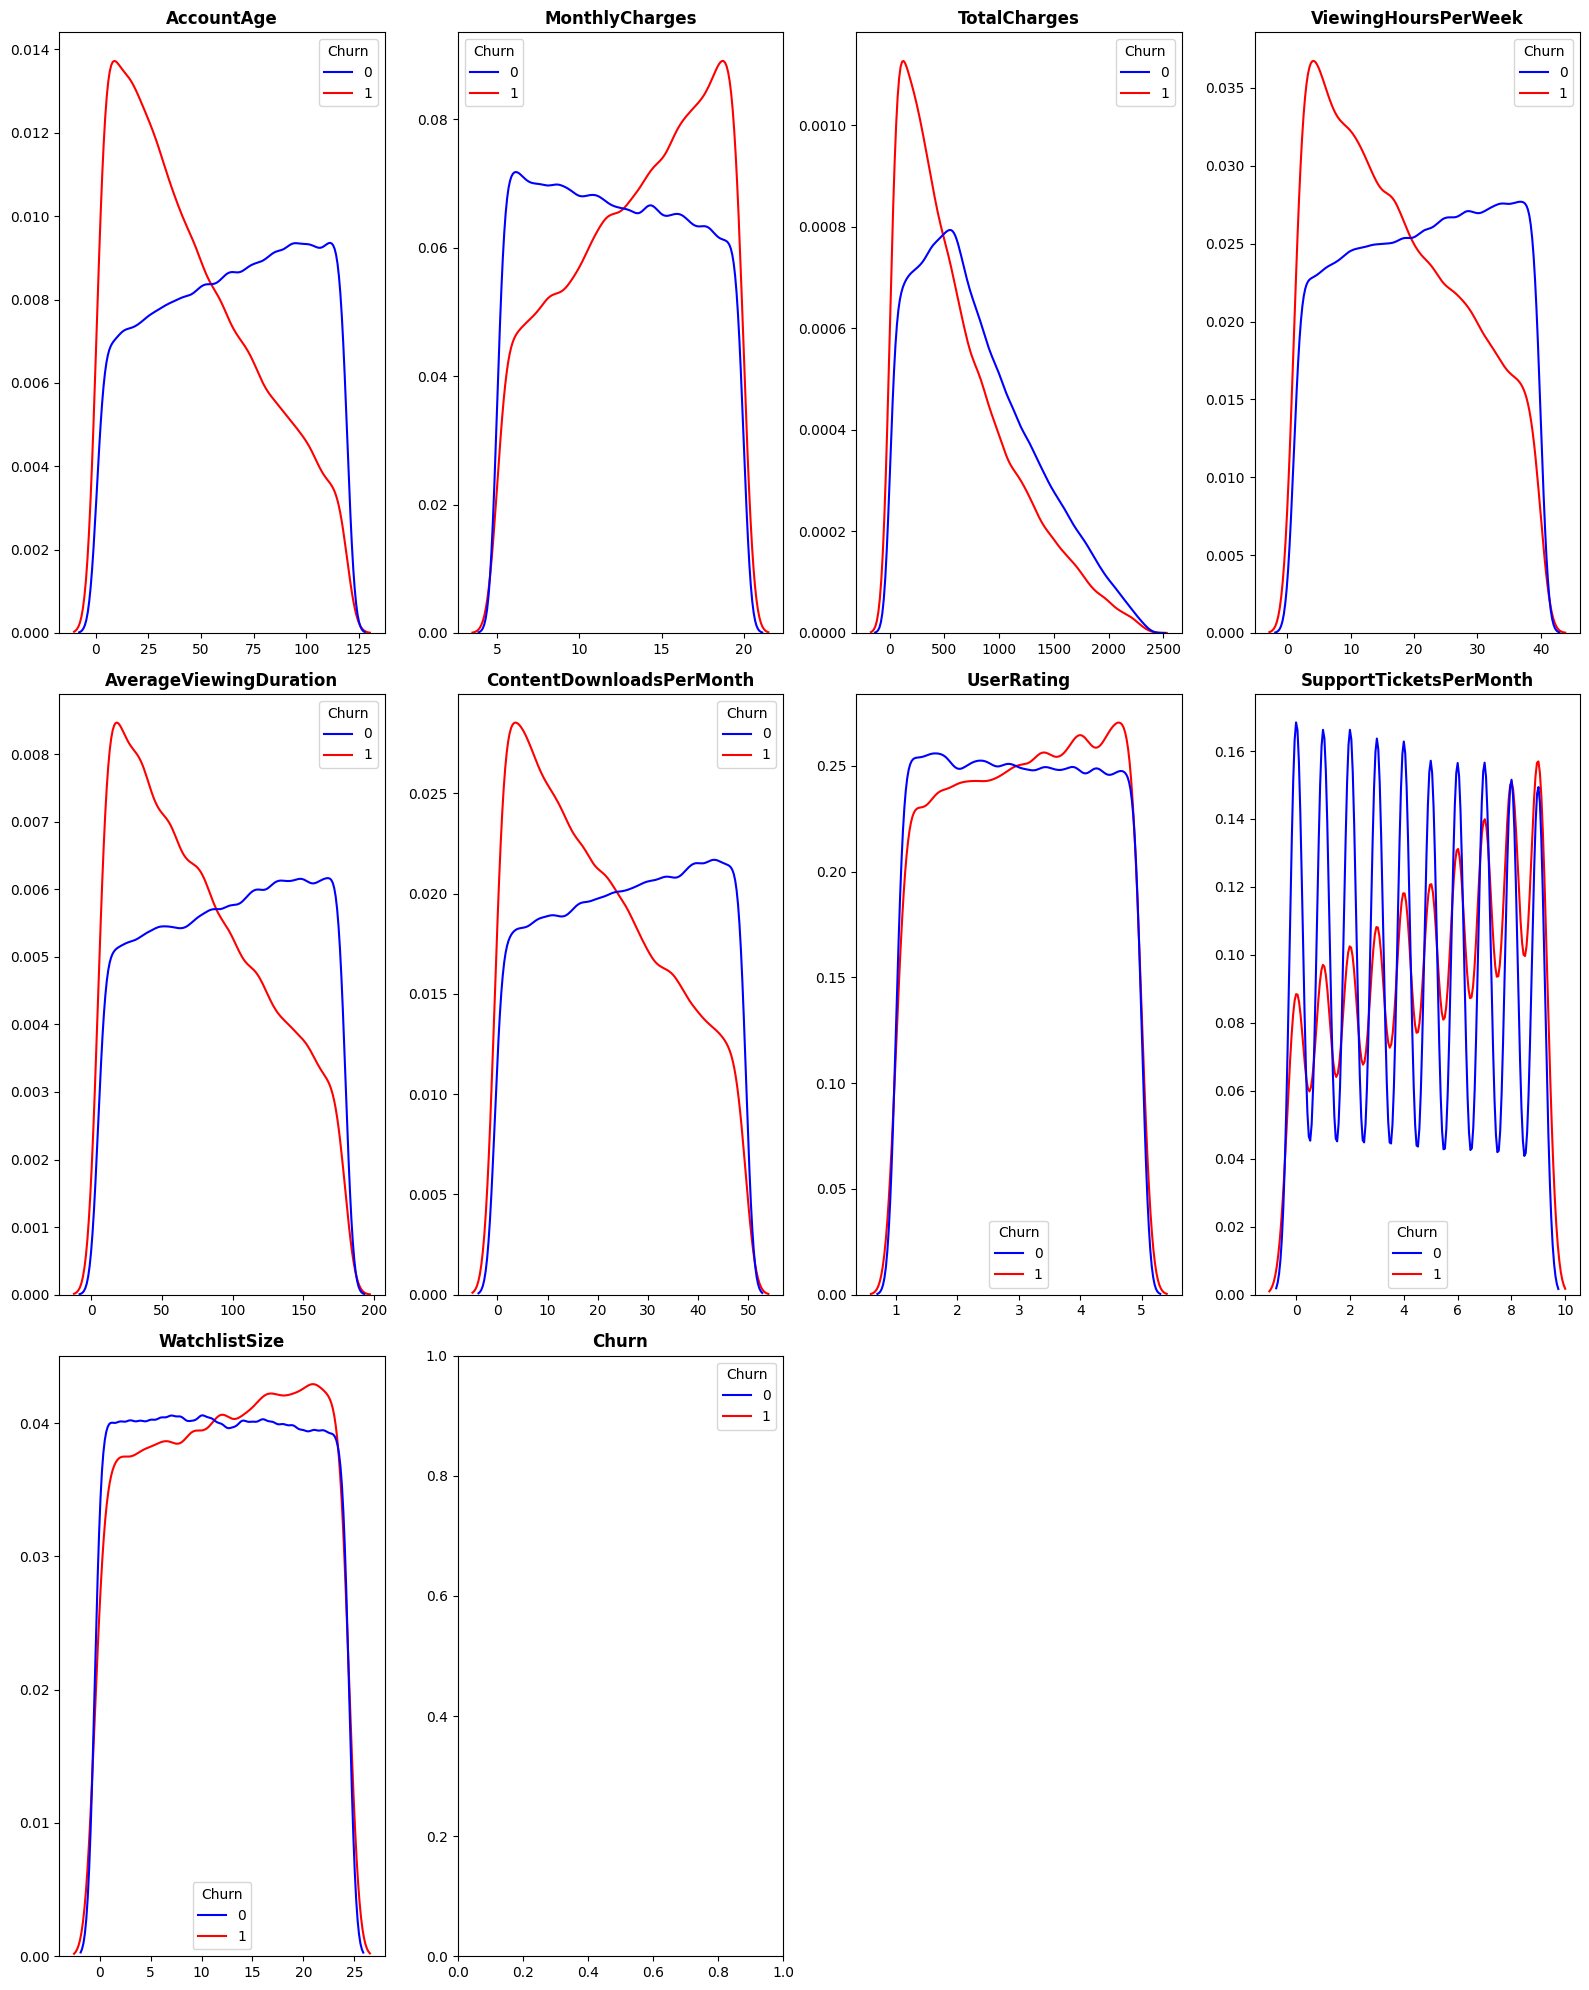

In [9]:
#numerical data
plt.figure(figsize=(16,20))
for i,col in enumerate(num_df.columns):
    plt.subplot(3,4,i+1)
    sns.kdeplot(num_df,x=col, hue="Churn", common_norm=False, fill=False, palette=["blue", "red"])
    plt.title(col,weight="bold")
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

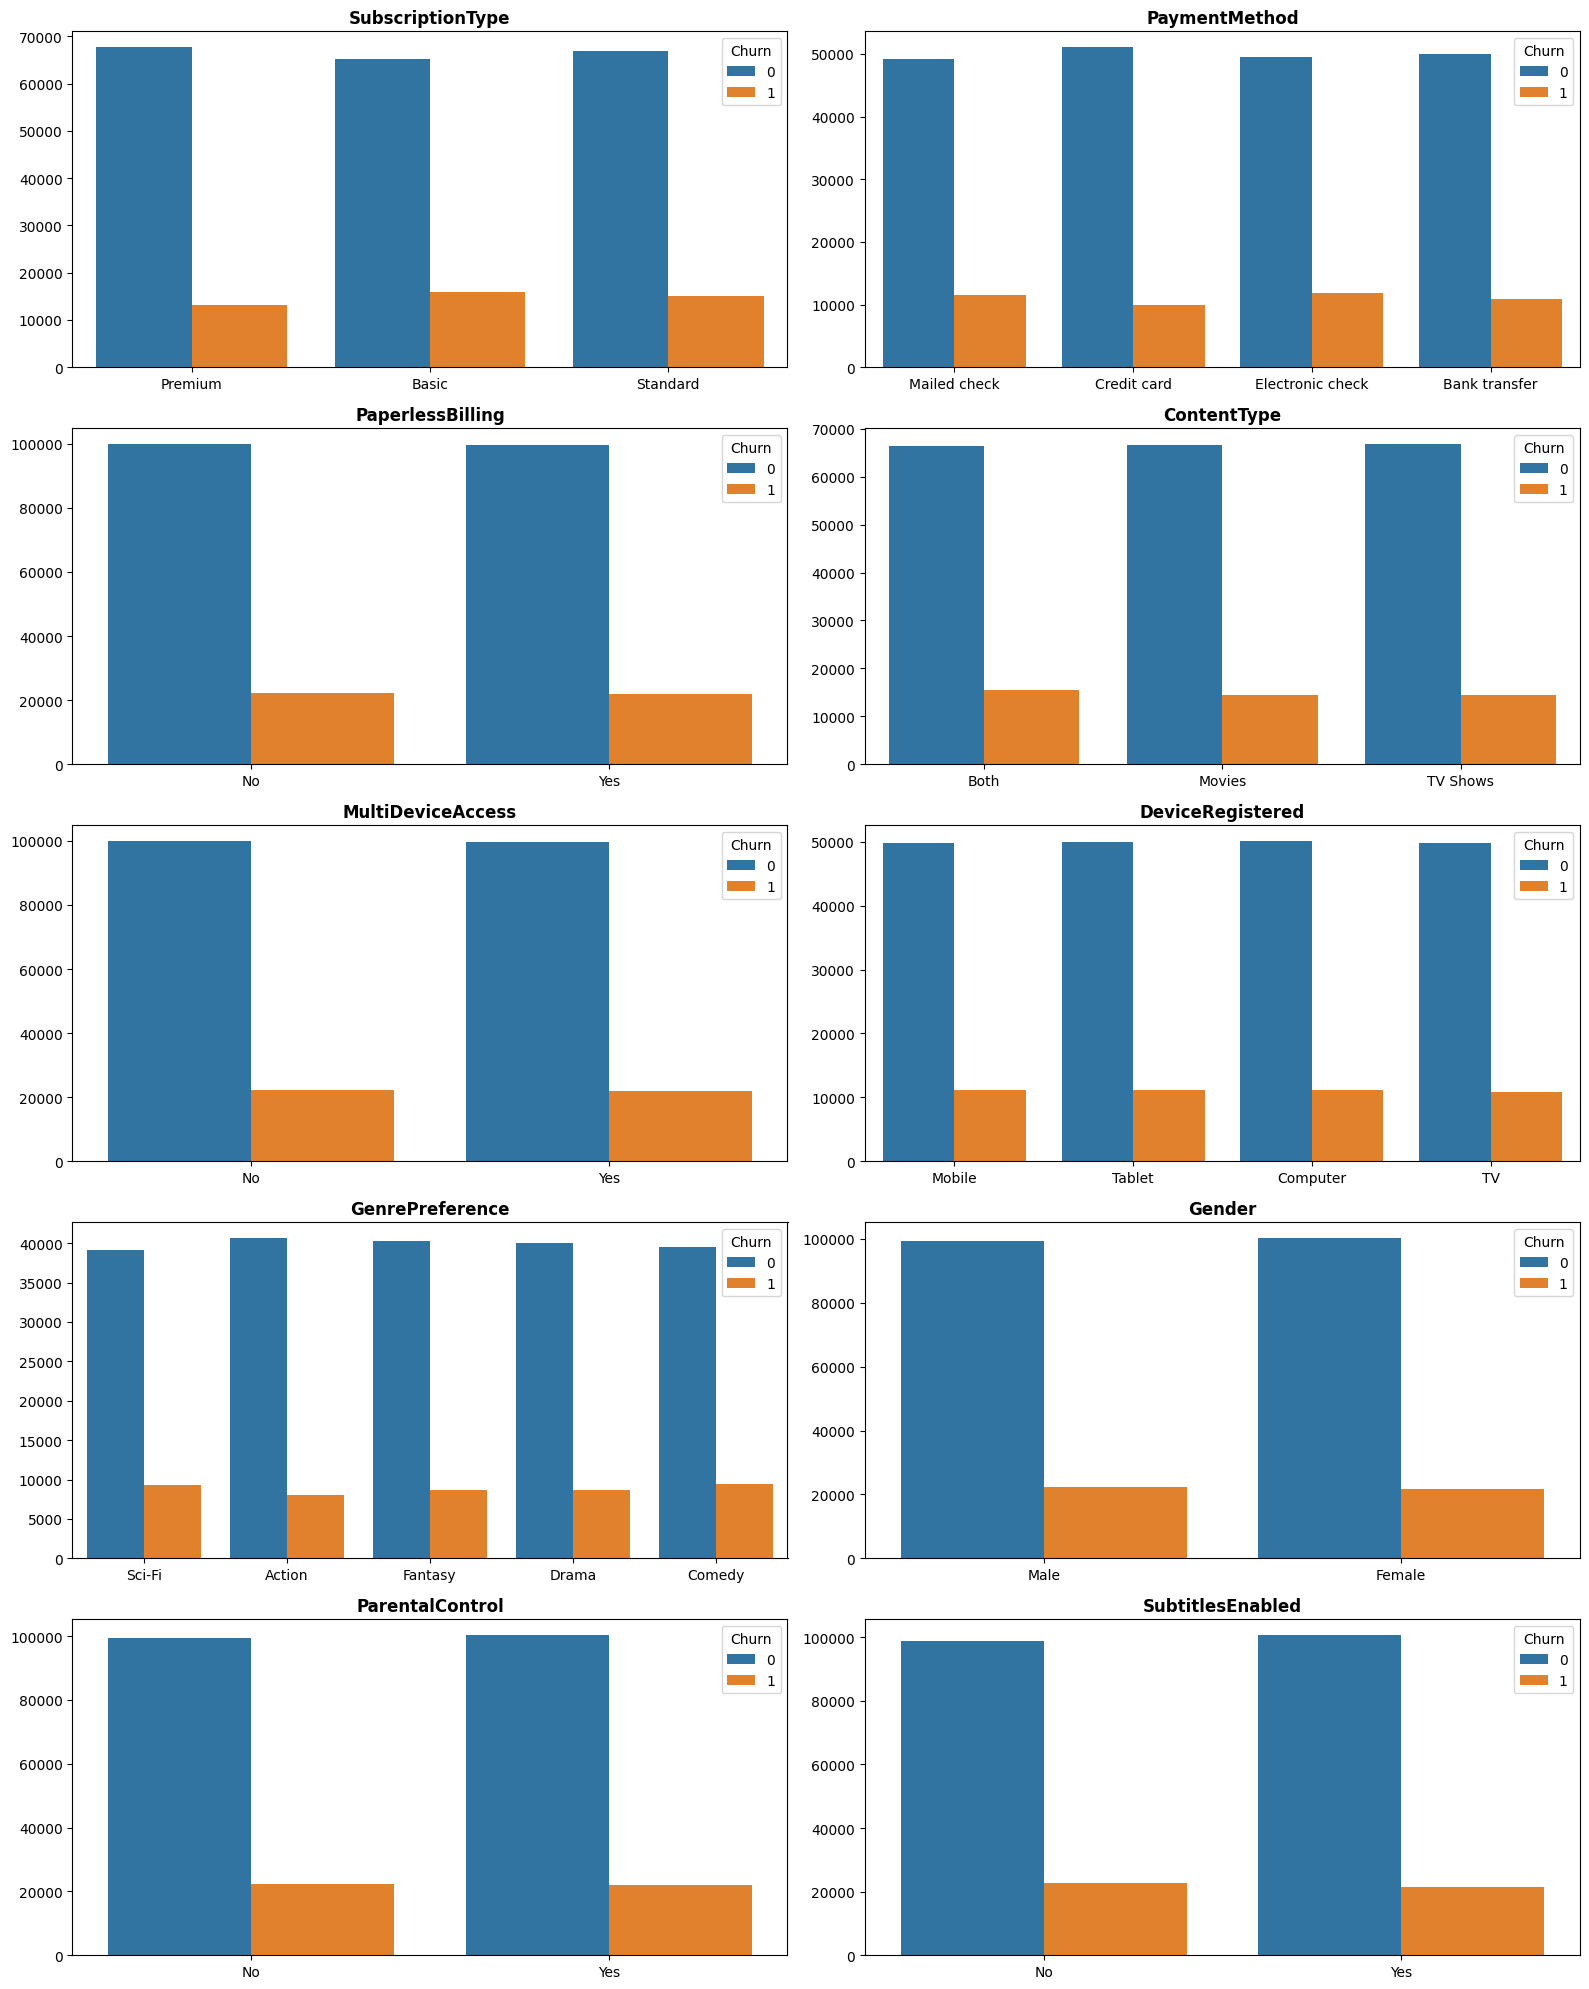

In [10]:
#categorial data

plt.figure(figsize=(16,20))
for i, col in enumerate(obj_df):
    plt.subplot(5,2,i+1)
    sns.countplot(data=train_df_noid, x=col, hue='Churn')
    plt.title(col,weight="bold")
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.show() 

All the numerical features have non-normal distribution. Moreoever, the parameter range for each feature is widely different. Therefore, we will normalize our data using the `MinMaxScaler` from `sklean` library. This normalization scales a given feature/parameter by keeoing the underlying distribution unchanged. In addition, we will also encode the categorical variables into integers/floats using `get_dummies` since our analysis will needed numerical data to train the underlying model(s).

In [11]:
train_df_noid_dummy=pd.get_dummies(train_df_noid,dtype=float) #convert categorical data to numerical
scaler=MinMaxScaler(feature_range=(0,1)) #scale all data from 0 to 1 
train_scaled=scaler.fit_transform(train_df_noid_dummy.to_numpy())
train_df_noid_dummy_scaled=pd.DataFrame(train_scaled,columns=train_df_noid_dummy.columns.values)
train_df_noid_dummy_scaled.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,0.161017,0.404346,0.091044,0.916881,0.334464,0.204082,0.294124,0.444444,0.125000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.474576,0.012343,0.122169,0.806430,0.118430,0.367347,0.619659,0.888889,0.958333,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.610169,0.474443,0.370216,0.163978,0.299222,0.469388,0.809708,0.666667,0.041667,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.262712,0.151580,0.095819,0.691296,0.723074,0.612245,0.819005,0.222222,1.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.474576,0.797540,0.404988,0.489320,0.230608,0.408163,0.654044,0.444444,0.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Plot the correlation of each feature with the label on a bar plot for a better visualization.

Text(0.5, 1.0, 'Correlation with Churn Parameter')

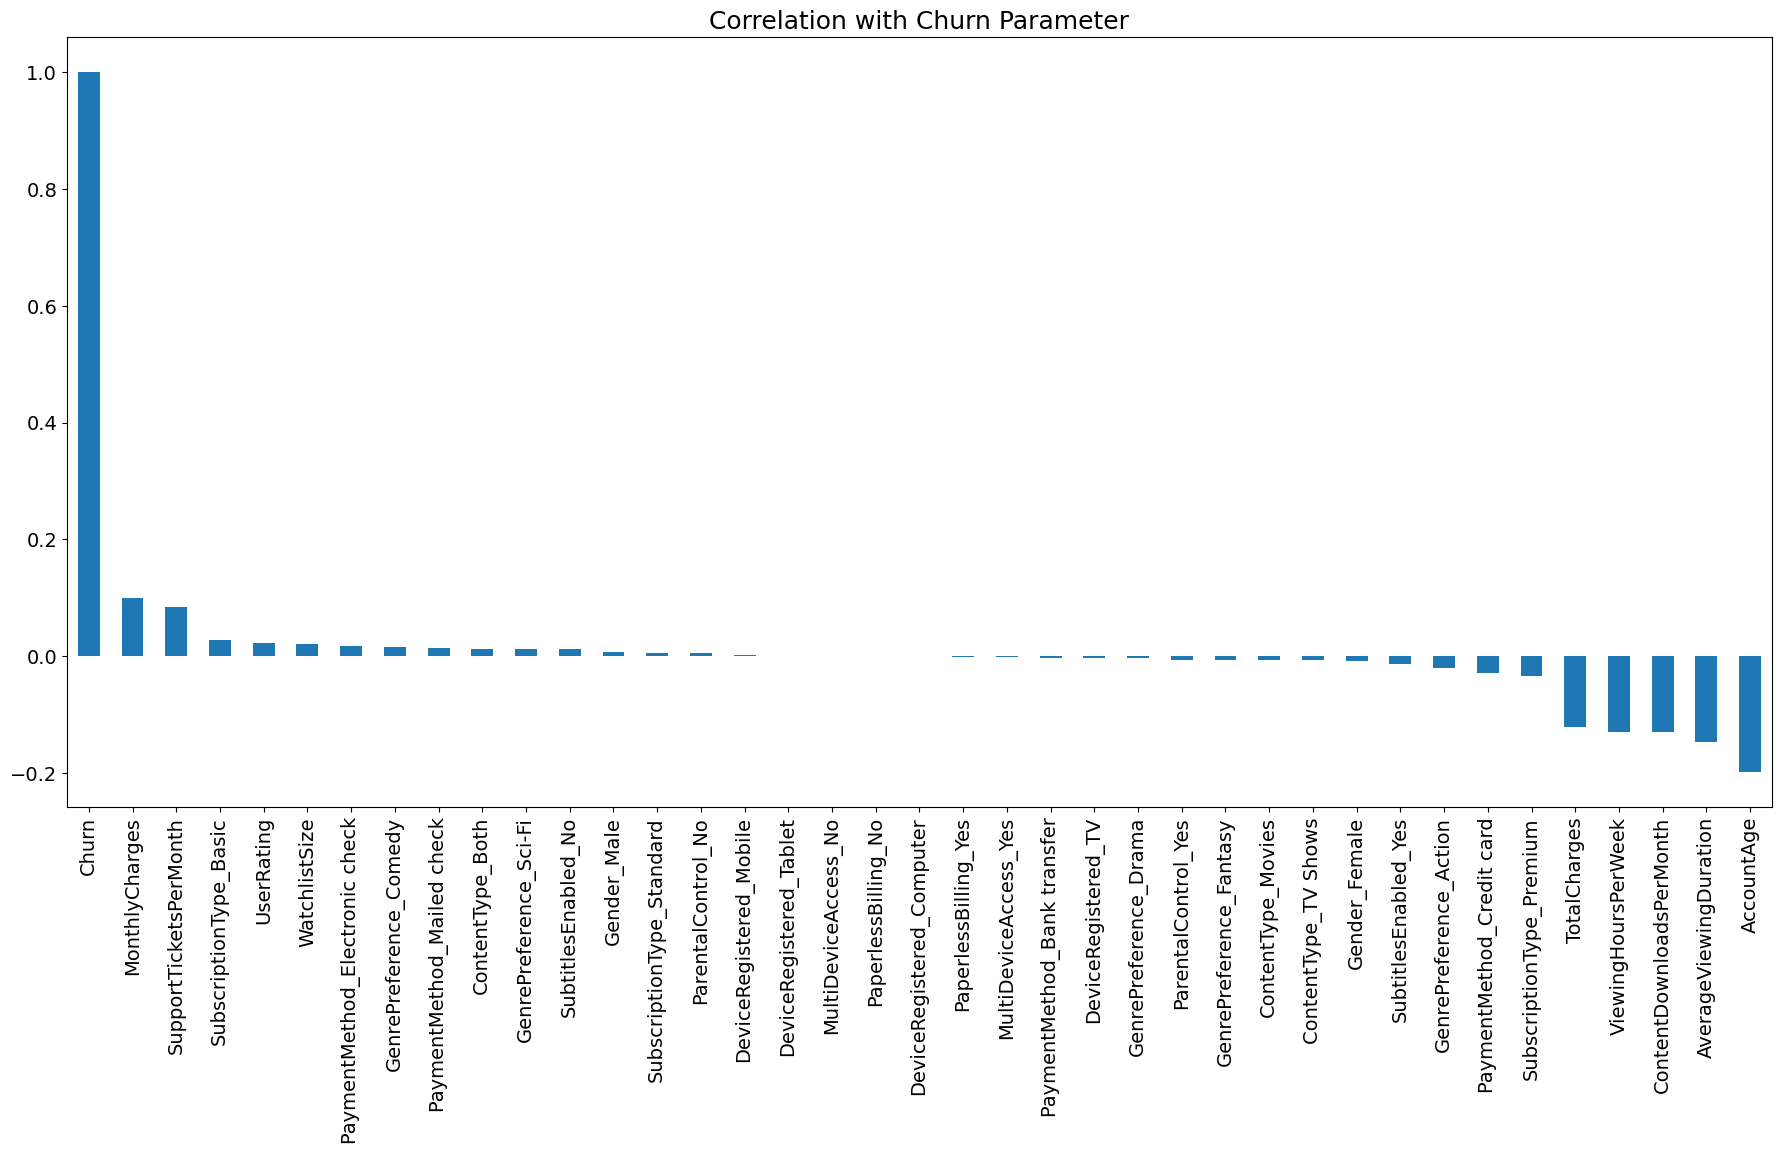

In [12]:
plt.figure(figsize=(22,10))
plt.rc('font', size=14)
train_df_noid_dummy_scaled.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.title("Correlation with Churn Parameter",fontsize=18)


<Axes: >

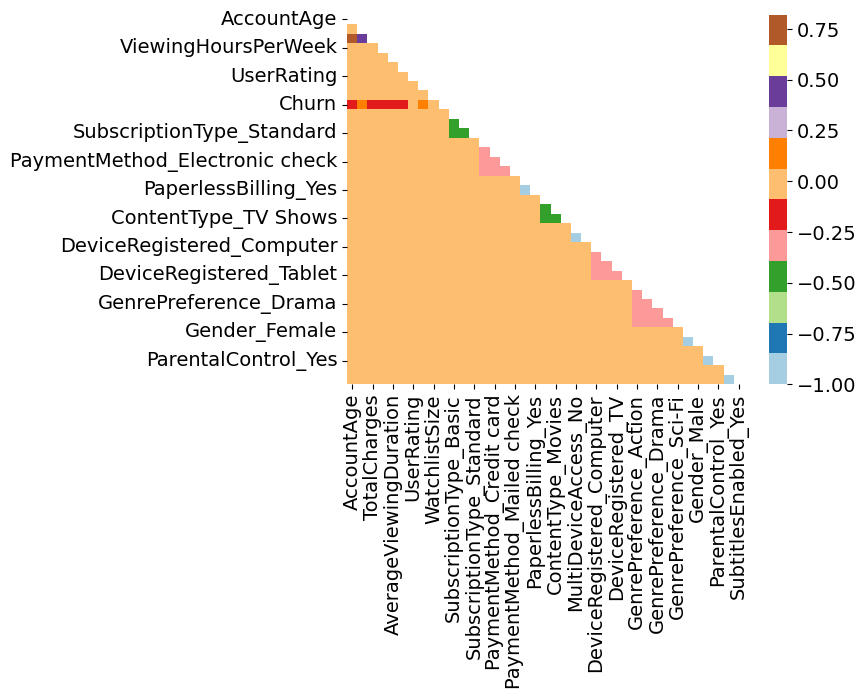

In [13]:
corr=train_df_noid_dummy_scaled.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr,mask=mask, cmap="Paired")

All the features play a small role for churning and none of them are correlated to each other. Therefore, we will proceed with all the features for the prediction analysis. 

### Are the given data imbalanced?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


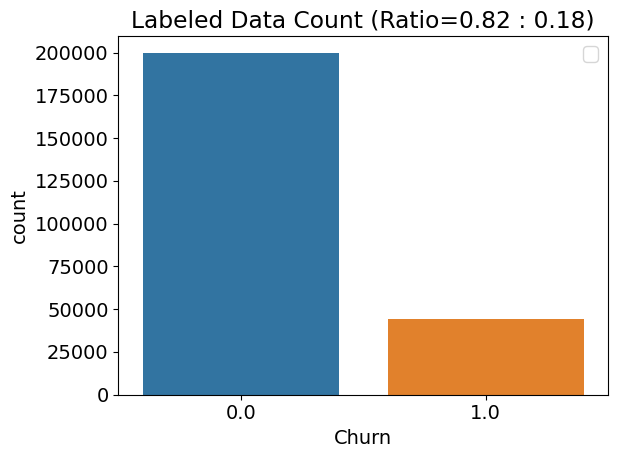

In [14]:
train_df_noid_dummy_scaled.Churn.value_counts()

non_churned=train_df_noid_dummy_scaled.Churn.value_counts()[0]/train_df_noid_dummy_scaled.Churn.value_counts().sum()
churned=1-non_churned
sns.countplot(train_df_noid_dummy_scaled,x="Churn")
plt.title(f"Labeled Data Count (Ratio={non_churned:.2f} : {churned:.2f})")
plt.legend()
plt.tight_layout()


As seen above, the data are highly imbalanced. Let us apply SMOTE to balance the dataset.

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
features=train_df_noid_dummy_scaled.drop("Churn",axis=1)
labels=train_df_noid_dummy_scaled.Churn
features_smoted, labels_smoted = sm.fit_resample(features,labels)
#check if SMOTE balanced the two classes
labels_smoted.value_counts()[0]=labels_smoted.value_counts()[1]

#### Compare the test and training data distributions for all the features 

Text(0.5, 1.0, 'Box Plot Comparison of Columns between Training and Test Data Frames')

<Figure size 2400x600 with 0 Axes>

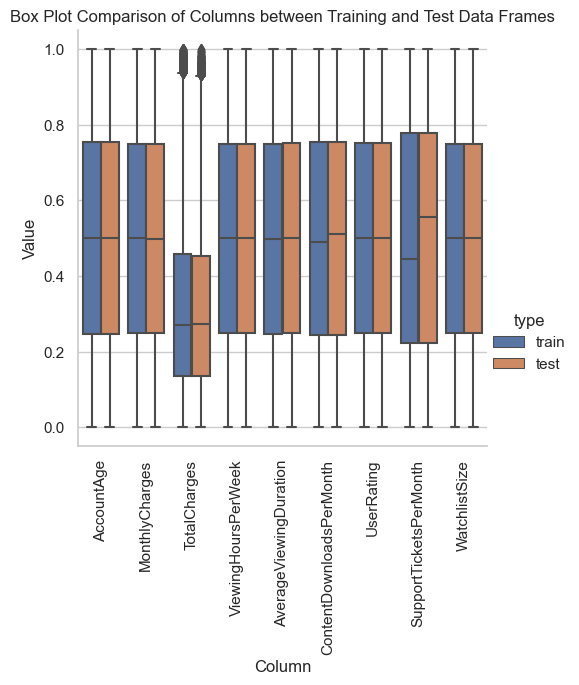

In [16]:
#we need to make predictions on the test set, but first make it like the training set
test_df_noid=test_df.drop("CustomerID",axis=1)
test_df_noid_dummy=pd.get_dummies(test_df_noid,dtype=float)
scaler=MinMaxScaler(feature_range=(0,1)) #scale all data from 0 to 1 
test_scaled=scaler.fit_transform(test_df_noid_dummy.to_numpy())
test_df_noid_dummy_scaled=pd.DataFrame(test_scaled,columns=test_df_noid_dummy.columns.values)
test_num_df_scaled=test_df_noid_dummy_scaled[num_df.columns.to_list()[:-1]]
num_df_scaled=train_df_noid_dummy_scaled[num_df.columns.to_list()[:-1]]
train_no_churn=num_df_scaled#test_num_df_scaled.drop("Churn",axis=1)

# Add a 'Data Frame' column to distinguish between the two data frames
train_no_churn['type'] = 'train'
test_num_df_scaled['type'] = 'test'

# Concatenate the data frames
combined_df = pd.concat([train_no_churn, test_num_df_scaled], ignore_index=True)

# Melt the data frames to create a 'variable' column for box plot
melted_df = pd.melt(combined_df, id_vars=['type'], value_vars=train_no_churn.columns.to_list())

# Create a box plot using catplot
plt.figure(figsize=(24, 6))
sns.set(style="whitegrid")
sns.catplot(data=melted_df, x='variable', y='value', kind='box', hue='type')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box Plot Comparison of Columns between Training and Test Data Frames')

#### We are ready to proceed to train our model(s) on the given data.
First, we will split the given data into training and validation samples to check the accuracy of trained model(s).
We will apply the following four models to train our data and compare the results before submission
1. Random Forest Classifier
2. XGBoost
3. Logistic Regression
4. Sequential Neural Network

In [17]:
#Split the data
features_train,features_val,labels_train,labels_val=train_test_split(features_smoted, labels_smoted,test_size=0.2)


We will use the `RandomForestClassifier` from the `sklearn` library employing 1000 decision trees with leaf splitting to a depth of 2. 

In [18]:
model_rf=RandomForestClassifier(n_estimators=500, criterion='gini', random_state = 42,max_depth=2, min_samples_leaf=2)
model_rf.fit(features_train, labels_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=500,
                       random_state=42)

#### Predictions on the given test data
First, we will modify the test data set according to the training data. This includes converting categorial data to numerical as well as applying the min max scaler for normalization.

In [19]:
#predict using the random forest classifier now
val_pred_rf=model_rf.predict(features_val) # predict class with predict 
test_pred_rf=model_rf.predict_proba(test_df_noid_dummy) #predict probability
# the following is needed for submission 
prediction_df_rf=pd.DataFrame({"CustomerID":test_df.CustomerID,"predicted_probability":test_pred_rf[:,1] })


#### Evaluate the model 
1. Check various metrics to evaluate the model
2. Plot the features importances in order 

In [20]:
roc_score_rf=roc_auc_score(labels_val, val_pred_rf, average='weighted')
accuracy_rf = accuracy_score(labels_val, val_pred_rf)
conf_matrix_rf = confusion_matrix(labels_val, val_pred_rf)
report_rf = classification_report(labels_val, val_pred_rf)

print(f"ROC score: {roc_score_rf:10.2f}")
print(f"Accuracy: {accuracy_rf:10.2f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", report_rf)
#ConfusionMatrixDisplay.from_predictions(labels_val, val_pred_rf)


ROC score:       0.70
Accuracy:       0.70
Confusion Matrix:
 [[27208 12628]
 [11200 28806]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.68      0.70     39836
         1.0       0.70      0.72      0.71     40006

    accuracy                           0.70     79842
   macro avg       0.70      0.70      0.70     79842
weighted avg       0.70      0.70      0.70     79842



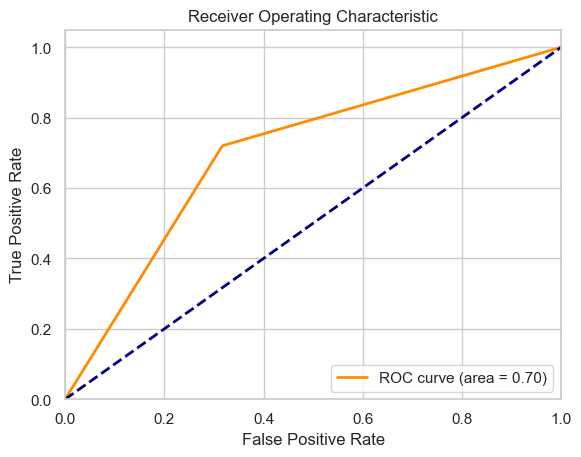

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(labels_val, val_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

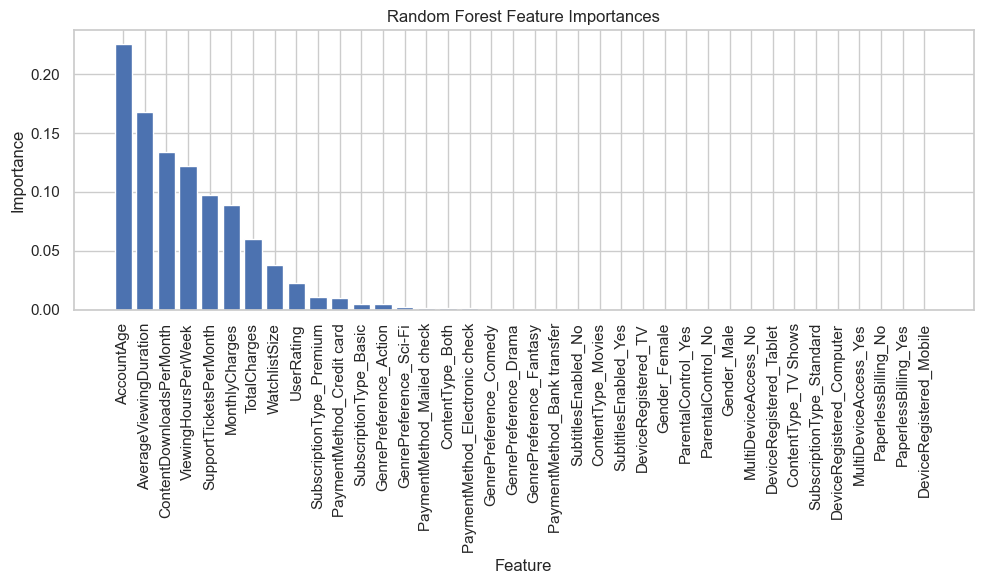

In [22]:
feature_names=features_val.columns
feature_importances_rf = model_rf.feature_importances_
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_importances_rf = feature_importances_rf[sorted_indices_rf]
sorted_feature_names_rf = feature_names[sorted_indices_rf]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances_rf)), sorted_importances_rf, align='center')
plt.xticks(range(len(sorted_importances_rf)), sorted_feature_names_rf, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()

### Repeat the above with XGBoost classifier

In [24]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=500,random_state=42)
model_xgb.fit(features_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [25]:
#we need to make predictions on the test set, but first make it like the trainign set
test_df_noid=test_df.drop("CustomerID",axis=1)
test_df_noid_dummy=pd.get_dummies(test_df_noid,dtype=float)
#features_smoted.columns==test_df_noid_dummy.columns
val_pred_xgb=model_xgb.predict(features_val) # predict class with predict 
test_pred_xgb=model_xgb.predict_proba(test_df_noid_dummy) #predict probability
# the following is needed for submission 
prediction_df_xgb=pd.DataFrame({"CustomerID":test_df.CustomerID,"predicted_probability":test_pred_xgb[:,1] })

In [26]:
roc_score_xgb=roc_auc_score(labels_val, val_pred_xgb, average='weighted')
accuracy_xgb = accuracy_score(labels_val, val_pred_xgb)
conf_matrix_xgb = confusion_matrix(labels_val, val_pred_xgb)
report_xgb = classification_report(labels_val, val_pred_xgb)

print(f"ROC score: {roc_score_xgb:10.2f}")
print(f"Accuracy: {accuracy_xgb:10.2f}")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", report_xgb)

ROC score:       0.89
Accuracy:       0.89
Confusion Matrix:
 [[38465  1371]
 [ 7699 32307]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.89     39836
         1.0       0.96      0.81      0.88     40006

    accuracy                           0.89     79842
   macro avg       0.90      0.89      0.89     79842
weighted avg       0.90      0.89      0.89     79842



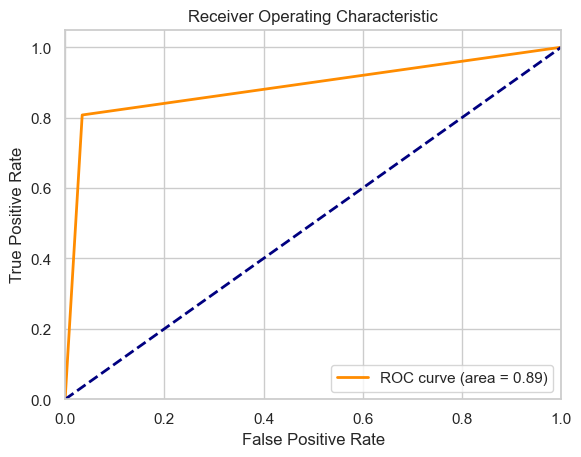

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(labels_val, val_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

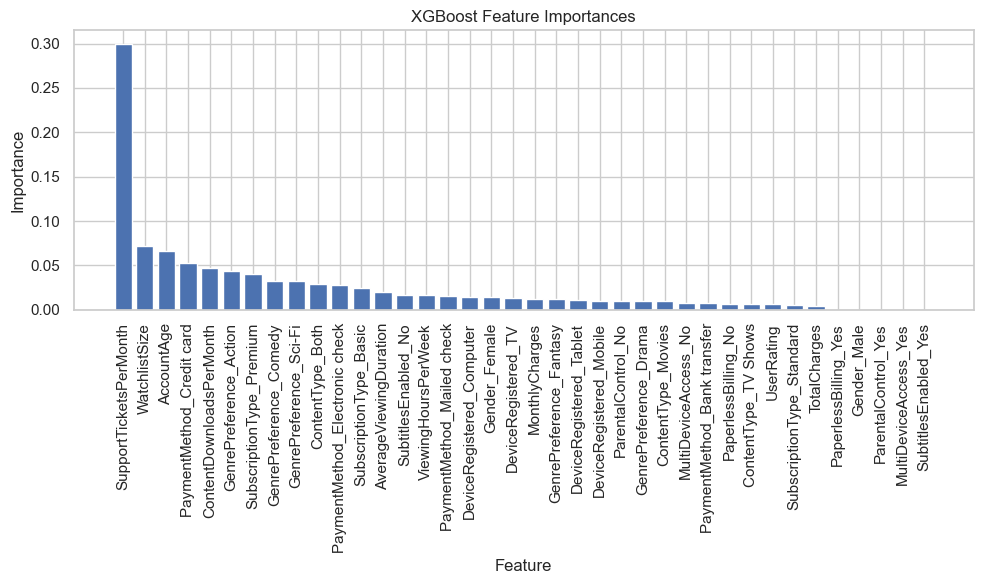

In [28]:
feature_names=features_val.columns
feature_names=features_val.columns
feature_importances_xgb = model_xgb.feature_importances_
sorted_indices_xgb = np.argsort(feature_importances_xgb)[::-1]
sorted_importances_xgb = feature_importances_xgb[sorted_indices_xgb]
sorted_feature_names_xgb = feature_names[sorted_indices_xgb]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances_xgb)), sorted_importances_xgb, align='center')
plt.xticks(range(len(sorted_importances_xgb)), sorted_feature_names_xgb, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.tight_layout()

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(features_train, labels_train)

LogisticRegression(max_iter=1000)

In [30]:
#we need to make predictions on the test set, but first make it like the trainign set
test_df_noid=test_df.drop("CustomerID",axis=1)
test_df_noid_dummy=pd.get_dummies(test_df_noid,dtype=float)
#features_smoted.columns==test_df_noid_dummy.columns
val_pred_lr=model_lr.predict(features_val) # predict class with predict 
test_pred_lr=model_lr.predict_proba(test_df_noid_dummy) #predict probability
# the following is needed for submission 
prediction_df_lr=pd.DataFrame({"CustomerID":test_df.CustomerID,"predicted_probability":test_pred_lr[:,1] })

In [31]:
roc_score_lr=roc_auc_score(labels_val, val_pred_lr, average='weighted')
accuracy_lr = accuracy_score(labels_val, val_pred_lr)
conf_matrix_lr = confusion_matrix(labels_val, val_pred_lr)
report_lr = classification_report(labels_val, val_pred_lr)
print(f"ROC score: {roc_score_lr:10.2f}")
print(f"Accuracy: {accuracy_lr:10.2f}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", report_lr)

ROC score:       0.70
Accuracy:       0.70
Confusion Matrix:
 [[27255 12581]
 [11295 28711]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.68      0.70     39836
         1.0       0.70      0.72      0.71     40006

    accuracy                           0.70     79842
   macro avg       0.70      0.70      0.70     79842
weighted avg       0.70      0.70      0.70     79842



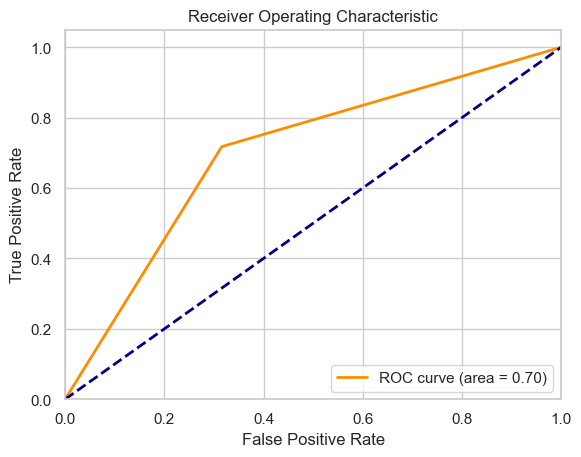

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr_lr, tpr_lr, thresholds_lr = roc_curve(labels_val, val_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

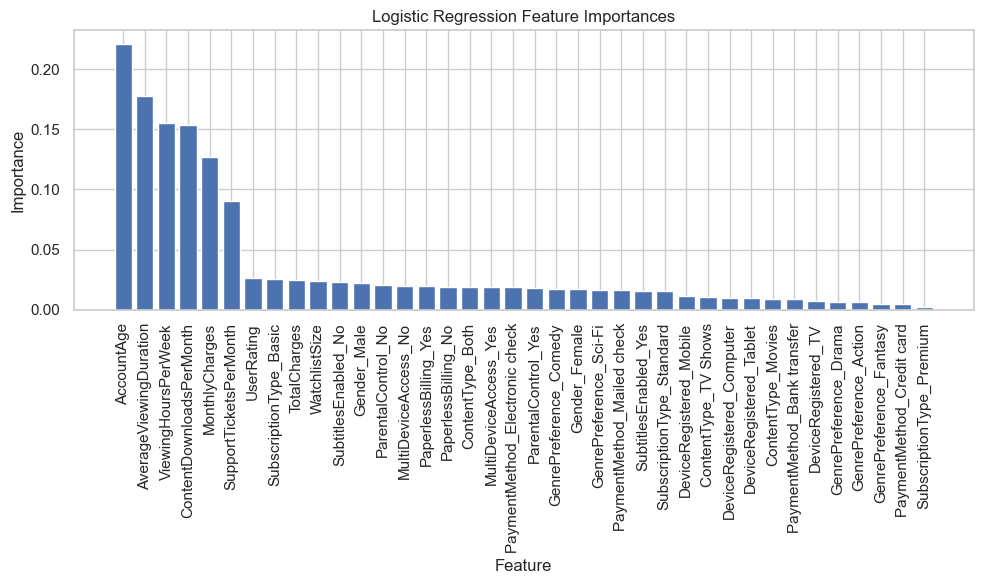

In [33]:
feature_names=features_val.columns
feature_importances_lr = abs(model_lr.coef_[0])/10
sorted_indices_lr = np.argsort(feature_importances_lr)[::-1]
sorted_importances_lr = feature_importances_lr[sorted_indices_lr]
sorted_feature_names_lr = feature_names[sorted_indices_lr]
# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances_lr)), sorted_importances_lr, align='center')
plt.xticks(range(len(sorted_importances_lr)), sorted_feature_names_lr, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importances')
plt.tight_layout()


#### Let us view the features as well as ROC for all three models together for comparison

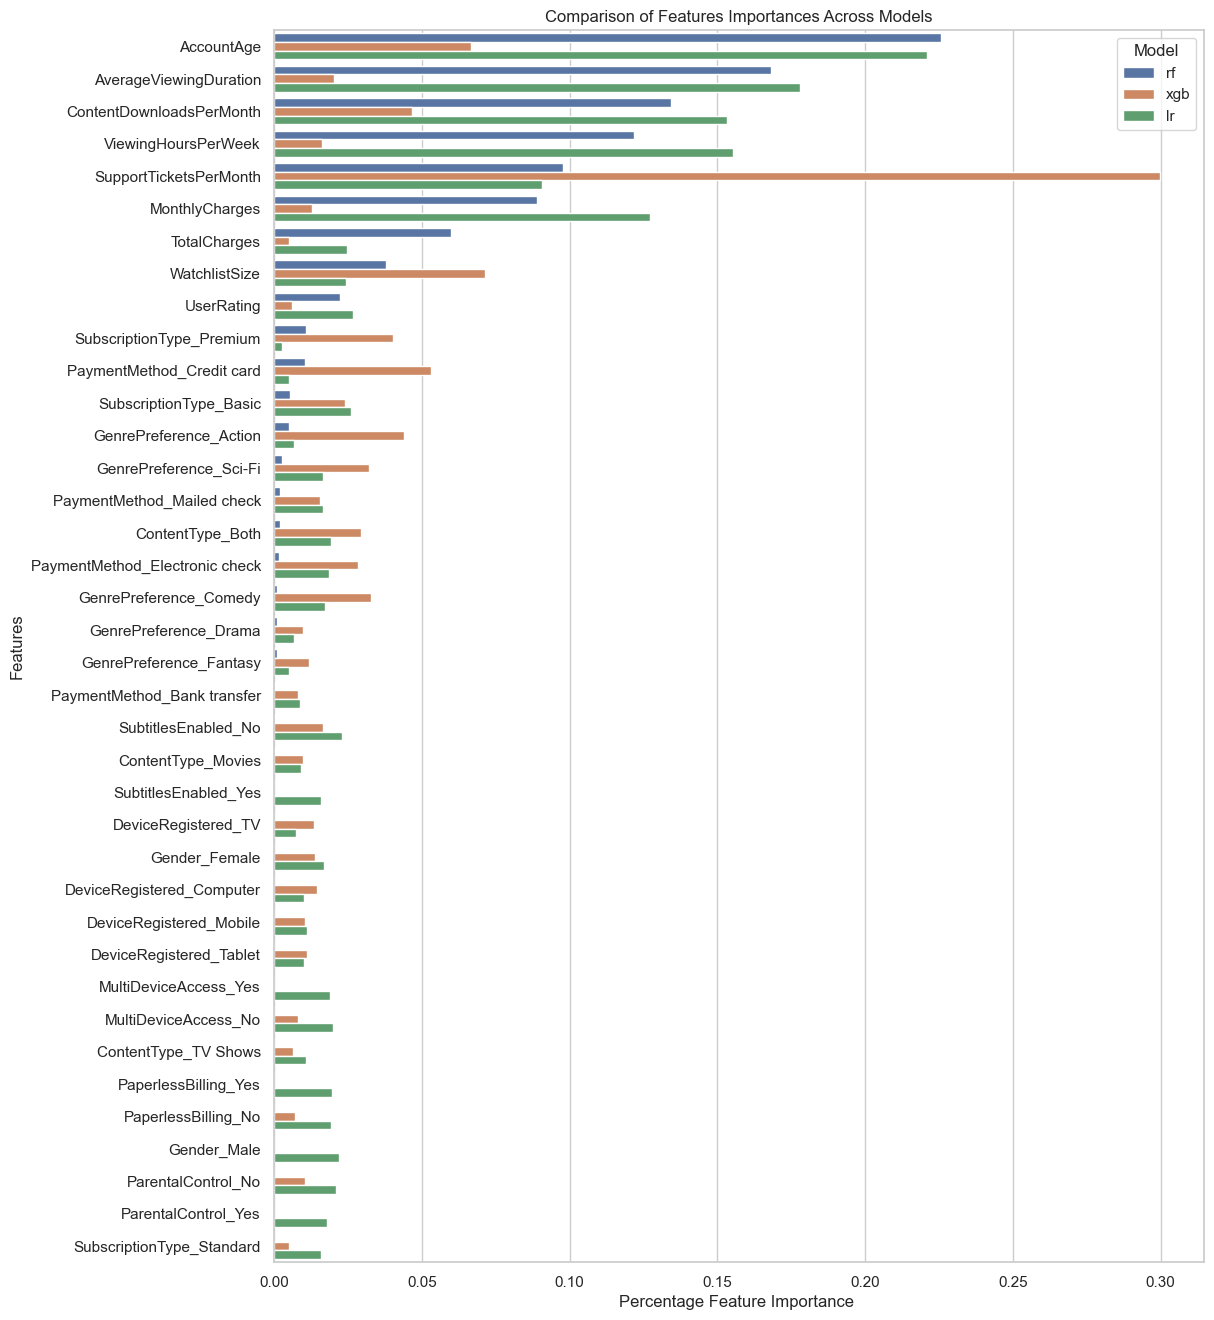

In [34]:
#Write all the feature importances to a dataframe 
feature_importances_df=pd.DataFrame({"Feature":feature_names,"rf":feature_importances_rf,"xgb":feature_importances_xgb,"lr":feature_importances_lr})
feature_importances_sorted=feature_importances_df.sort_values(by="rf",ascending=False)
# Melt the DataFrame to long format
melted_df = pd.melt(feature_importances_sorted, id_vars='Feature', var_name='Score', value_name='values')
plt.figure(figsize=(12, 16))
plt.rc('font', size=18)
# Create a horizontal bar plot using Seaborn
sns.barplot(x='values', y='Feature', hue='Score', data=melted_df)  # Categories on y-axis for horizontal bars
plt.title('Comparison of Features Importances Across Models')
plt.xlabel('Percentage Feature Importance ')
plt.ylabel('Features')
plt.legend(title='Model')

From the above plot, it is evident that most of the high importance features are consistent among the three models. However, `XGBoost` classifier ranks a feature called 'SupportTicketperMonth' at a much higher percentage than the other two classifiers. The `kdeplot` earlier displays a clear distinction between churning and non-churning customers via this feature, too. 

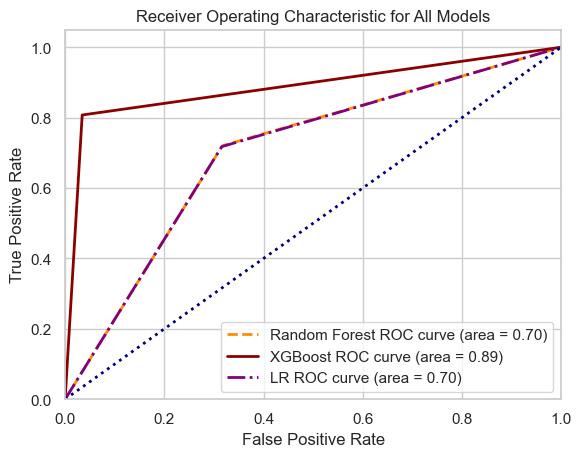

In [35]:
#Plot ROC curves for all models
plt.figure()
plt.rcParams['font.size'] = 10
plt.plot(fpr, tpr, color='darkorange', lw=2, linestyle='--',label='Random Forest ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_xgb, tpr_xgb, color='darkred', lw=2, linestyle='-',label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_lr, tpr_lr, color='purple', lw=2, linestyle='-.',label='LR ROC curve (area = %0.2f)' % roc_auc_lr)
#plot the 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for All Models')
plt.legend(loc='lower right')


Text(0.5, 0.98, 'Comparison of Confusion Matrices Across Different Models')

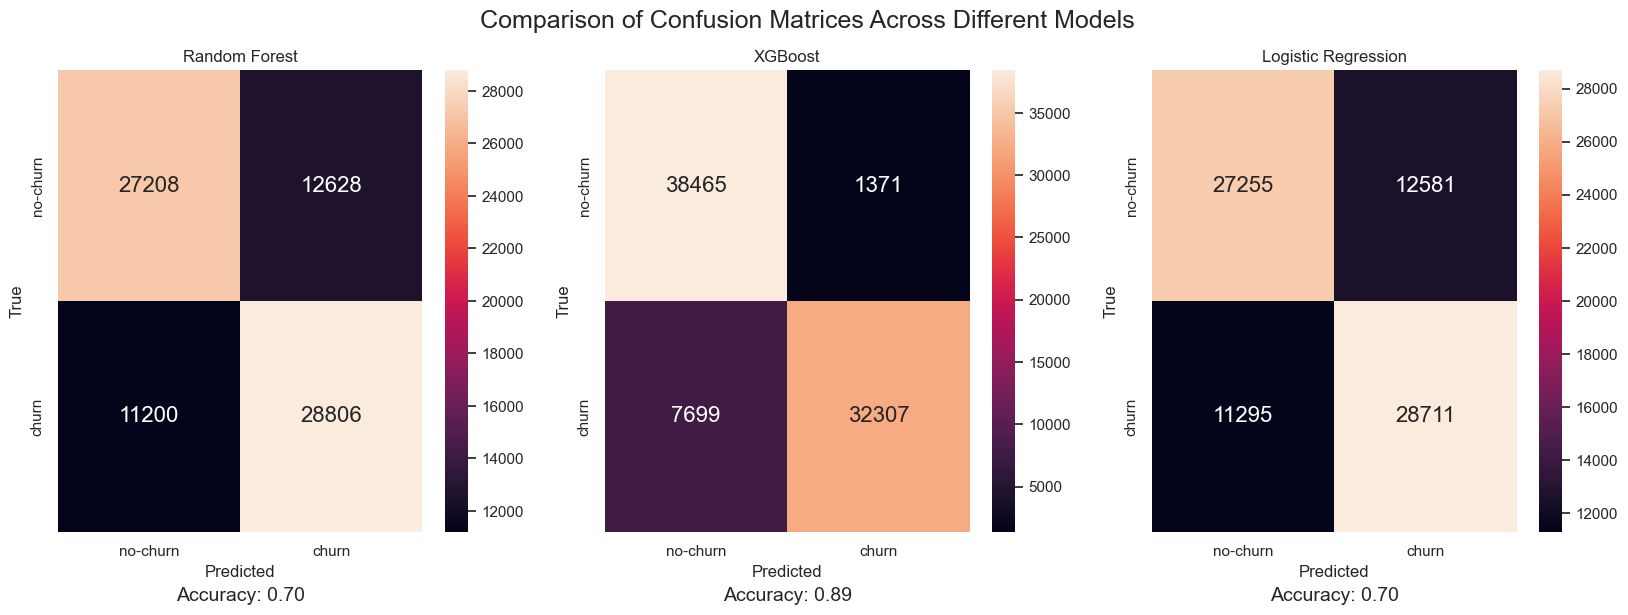

In [36]:
# Create a list of model names
model_names = ['Random Forest','XGBoost','Logistic Regression']
labels=['no-churn','churn']
confusion_matrices=[conf_matrix_rf,conf_matrix_xgb,conf_matrix_lr]

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.rc("font",size=16)
# Plot confusion matrices for each model
for i, (model_name, confusion_matrices) in enumerate(zip(model_names, confusion_matrices)):
    sns.heatmap(confusion_matrices, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].xaxis.set_ticklabels(labels); axes[i].yaxis.set_ticklabels(labels)

    # Print the prediction accuracy and model name
    accuracy = (confusion_matrices[0, 0] + confusion_matrices[1, 1]) / np.sum(confusion_matrices)
    axes[i].text(0.5, -0.15, f'Accuracy: {accuracy:.2f}', size=14, ha="center", transform=axes[i].transAxes)
plt.suptitle('Comparison of Confusion Matrices Across Different Models', fontsize=18)


#### We will now investigate the above using a sequential neural network using `Keras` in `TensorFlow` library of python

In [37]:
# Build a simple neural network model
import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(features_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Train the model
model_nn=model.fit(features_train, labels_train, epochs=10, batch_size=64, validation_split=0.2,callbacks=early_stopping)
# Evaluate the model on the test set
loss, accuracy = model.evaluate(features_val, labels_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Epoch 1/10
3993/3993 [==============================] - 13s 3ms/step - loss: 0.5721 - accuracy: 0.7016 - val_loss: 0.5653 - val_accuracy: 0.7089
Epoch 2/10
3993/3993 [==============================] - 12s 3ms/step - loss: 0.5494 - accuracy: 0.7217 - val_loss: 0.5480 - val_accuracy: 0.7227
Epoch 3/10
3993/3993 [==============================] - 11s 3ms/step - loss: 0.5387 - accuracy: 0.7309 - val_loss: 0.5390 - val_accuracy: 0.7306
Epoch 4/10
3993/3993 [==============================] - 11s 3ms/step - loss: 0.5335 - accuracy: 0.7344 - val_loss: 0.5373 - val_accuracy: 0.7310
Epoch 5/10
3993/3993 [==============================] - 13s 3ms/step - loss: 0.5290 - accuracy: 0.7372 - val_loss: 0.5362 - val_accuracy: 0.7322
Epoch 6/10
3993/3993 [==============================] - 17s 4ms/step - loss: 0.5251 - accuracy: 0.7399 - val_loss: 0.5291 - val_accuracy: 0.7363
Epoch 7/10
3993/3993 [==============================] - 20s 5ms/step - loss: 0.5215 - accuracy: 0.7428 - val_loss: 0.5281 - val_ac

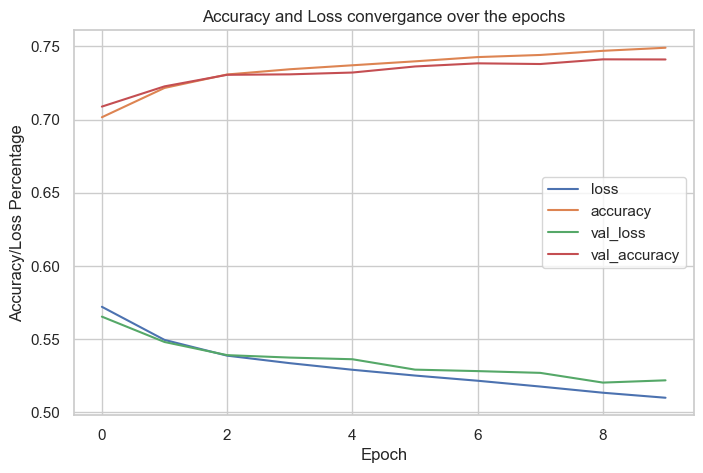

In [38]:
pd.DataFrame(model_nn.history).plot(figsize=(8,5))
plt.title("Accuracy and Loss convergance over the epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss Percentage")
L=plt.legend()
#L.get_texts()[0].set_text('')

In [39]:
test_pred_nn_orig=model.predict(test_df_noid_dummy_scaled.values)
from itertools import chain
test_pred_nn=list(chain.from_iterable(test_pred_nn_orig))
# the following is needed for submission 
prediction_df_nn=pd.DataFrame({"CustomerID":test_df.CustomerID,"predicted_probability":test_pred_nn })

3265/3265 [==============================] - 6s 2ms/step


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

In [47]:
preds_all=pd.DataFrame({"CustomerID":test_df.CustomerID,"RF_pred":test_pred_rf[:,1],"XGB_pred":test_pred_xgb[:,1],"LR_pred":test_pred_lr[:,1],"NN_pred":test_pred_nn})
preds_all.describe()

,RF_pred,XGB_pred,LR_pred,NN_pred
count,104480.000000,104480.000000,1.044800e+05,104480.000000
mean,0.335051,0.039769,1.899118e-05,0.399268
std,0.013129,0.054249,3.790649e-03,0.251600
min,0.281328,0.000008,0.000000e+00,0.002201
25%,0.334220,0.006465,9.942652e-295,0.178635
50%,0.337698,0.017860,1.510587e-223,0.372183
75%,0.340652,0.049285,3.800210e-158,0.604275
max,0.391096,0.557895,9.107468e-01,0.972319


<Axes: ylabel='Density'>

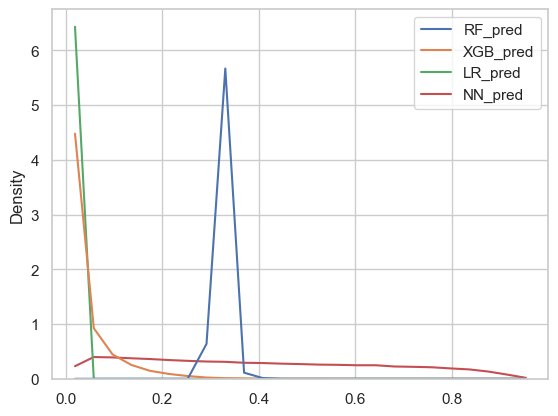

In [64]:
sns.histplot(preds_all,stat="density",bins=25,fill=False,element="poly")

From the above plot, we can infer that `XGBClassifier` performs better than the other classifiers for this case. Since we already saw that the test data is similar to training data, therefore, it is likely that most of the data in the test dataset should correspond to non-churning customers. 

#### We will finalize our test predictions based on the XGB classifier. 

In [74]:

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = prediction_df_xgb 
predicted_probability.iloc[::,0]

0         O1W6BHP6RM
1         LFR4X92X8H
2         QM5GBIYODA
3         D9RXTK2K9F
4         ENTCCHR1LR
             ...    
104475    UTKREC613O
104476    MDB4E477PS
104477    IPDIA02ZE1
104478    ITLFTPRJGV
104479    Y204GZY6NE
Name: CustomerID, Length: 104480, dtype: object

In [75]:

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df.CustomerID,
                             'predicted_probability': predicted_probability.iloc[::,1]})

In [76]:

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.016414
1,LFR4X92X8H,0.002362
2,QM5GBIYODA,0.101497
3,D9RXTK2K9F,0.026851
4,ENTCCHR1LR,0.005149
5,7A88BB5IO6,0.059364
6,70OMW9XEWR,0.133907
7,EL1RMFMPYL,0.021771
8,4IA2QPT6ZK,0.010737
9,AEDCWHSJDN,0.015529


In [1]:
import pandas
pandas.__version__

'2.0.3'